In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [5]:
def fibonacci_recursive(n):

    if n <= 1:
        return n
    else:
        return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

print(f"The 14th Fibonacci number is: {fibonacci_recursive(14)}")

The 10th Fibonacci number is: 377


In [6]:
# A cache to store computed Fibonacci values
fib_cache = {}

def fibonacci_dp(n):

    if n in fib_cache:
        return fib_cache[n]
    
    if n <= 1:
        result = n
    else:
        result = fibonacci_dp(n-1) + fibonacci_dp(n-2)
    
    fib_cache[n] = result
    return result

fib_cache = {}
print(f"The 14th Fibonacci number is: {fibonacci_dp(14)}")

# Can handle much larger numbers efficiently
fib_cache = {}
print(f"The 100th Fibonacci number is: {fibonacci_dp(100)}")

The 10th Fibonacci number is: 55
The 100th Fibonacci number is: 354224848179261915075


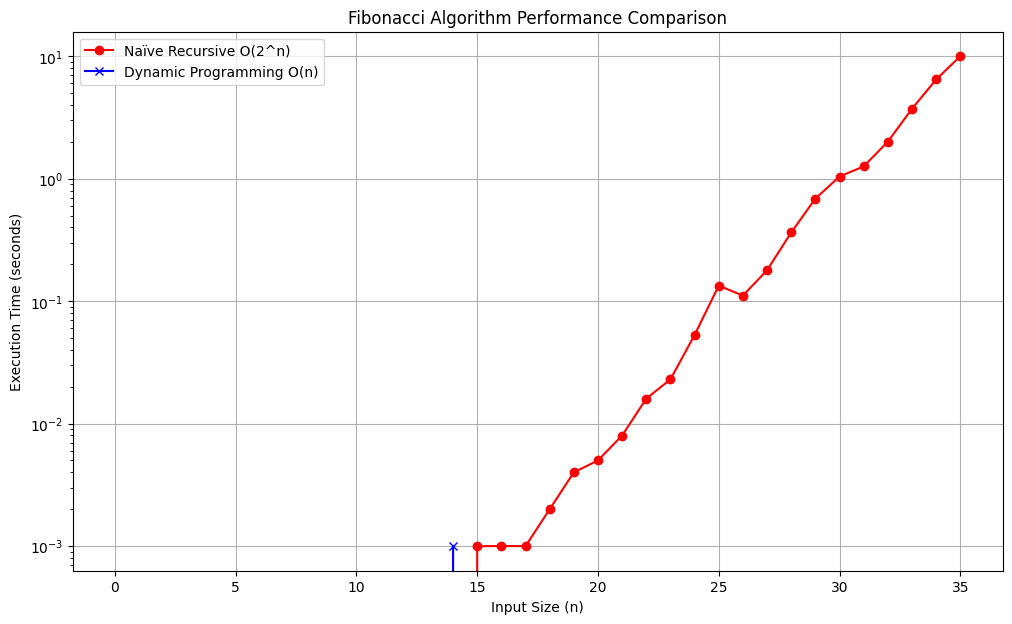

In [8]:
# --- Performance Measurement ---

# Define the range of input sizes (n) for testing
# Note: The naive recursive version is too slow for n > 40
recursive_n_values = range(36)
dp_n_values = range(36) # Using same range for a direct comparison on the plot

# Lists to store execution times
recursive_times = []
dp_times = []

# Measure time for the naive recursive version
for n in recursive_n_values:
    start_time = time.time()
    fibonacci_recursive(n)
    end_time = time.time()
    recursive_times.append(end_time - start_time)

# Measure time for the dynamic programming version
for n in dp_n_values:
    fib_cache = {} # Clear cache for each independent run
    start_time = time.time()
    fibonacci_dp(n)
    end_time = time.time()
    dp_times.append(end_time - start_time)
    
# --- Plotting the Results ---
plt.figure(figsize=(12, 7))
plt.plot(recursive_n_values, recursive_times, label='Naïve Recursive O(2^n)', color='red', marker='o')
plt.plot(dp_n_values, dp_times, label='Dynamic Programming O(n)', color='blue', marker='x')

plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Fibonacci Algorithm Performance Comparison')
plt.legend()
plt.grid(True)
# Using a logarithmic scale for the y-axis to better visualize the massive difference
plt.yscale('log')
plt.show()

In [9]:
def binary_search(arr, x):
    """
    Performs an iterative binary search on a sorted array.
    
    :param arr: A sorted list of elements.
    :param x: The element to search for.
    :return: The index of x if found, otherwise -1.
    """
    low = 0
    high = len(arr) - 1
    
    while low <= high:
        mid = (high + low) // 2
        
        # If x is greater, ignore left half
        if arr[mid] < x:
            low = mid + 1
        # If x is smaller, ignore right half
        elif arr[mid] > x:
            high = mid - 1
        # means x is present at mid
        else:
            return mid
            
    # If we reach here, then the element was not present
    return -1

# --- Test ---
sorted_array = [2, 3, 4, 10, 40, 55, 67, 80]
target = 10

result = binary_search(sorted_array, target)

if result != -1:
    print(f"Element is present at index {result}")
else:
    print("Element is not present in array")

Element is present at index 3


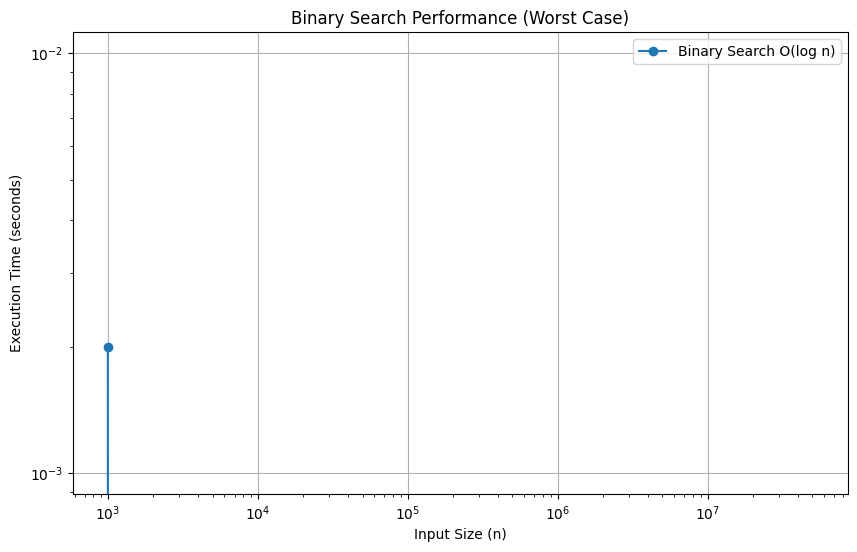

In [10]:
# Define a range of large input sizes
input_sizes = [1000, 10000, 100000, 1000000, 10000000, 50000000]
execution_times = []

# Measure execution time for each input size
for size in input_sizes:
    # Create a large sorted array
    sorted_array = np.arange(size)
    # Target is -1, which is guaranteed not to be in the array (worst case)
    target = -1
    
    start_time = time.time()
    binary_search(sorted_array, target)
    end_time = time.time()
    
    execution_times.append(end_time - start_time)

# --- Plotting the Results ---
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times, marker='o', label='Binary Search O(log n)')

plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Binary Search Performance (Worst Case)')
plt.xscale('log') # Use a log scale for the x-axis to better see the relationship
plt.yscale('log') # Use a log scale for y-axis to see the small time values
plt.legend()
plt.grid(True)
plt.show()